# Final (Video Games)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections
import networkx as nx
import matplotlib.gridspec as gridspec
from matplotlib.dates import MonthLocator, DateFormatter


%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf
from statsmodels.graphics.api import interaction_plot, abline_plot

analyse overtime
across categories
both exploration and presentation style

1. the general tendency of the focal variable over time (e.g., the
   trajectory of popularity of the average 'pop' album);
2. the distribution of the focal variable at multiple points in time;
3. the evolution of the focal variable for specific cases (e.g.,
   specific products);
4. the differences/similarities in 1, 2, and 3 across categories of
   entities (e.g., types of products).

the trajectory in the count of ratings received by product across time 
      (since the very first score up to six months later; exclude products whose 
      first score has been posted by less than six months);
  - the association between the trajectory in the count of ratings and 
      product attributes (e.g., product-market category, price);
  - the association between the trajectory in the count of ratings and 
      the timing/pace with which ratings are posted.

The **audience** for this chart is a team of experienced marketing
analysts who want to understand how/why attention (measured in terms of count of
ratings) develops around new products.  The chart is meant to serve both
exploration and presentations goals – analysts will use it (i) to
speculate about the factors that account for the trajectory in the
count of ratings; (ii) to update their client with a PowerPoint alike
slide-show.


<b> Review </b>
- <i>reviewerID </i> - ID of the reviewer, e.g. A2SUAM1J3GNN3B

- <i>asin</i> - ID of the product, e.g. 0000013714
- <i>reviewerName</i> - name of the reviewer
- <i>helpful</i> - helpfulness rating of the review, e.g. 2/3
- <i>reviewText</i> - text of the review
- <i>overall</i> - rating of the product
- <i>summary</i> - summary of the review
- <i>unixReviewTime</i> - time of the review (unix time)
- <i>reviewTime</i> - time of the review (raw)

<b> Metadata </b>
- <i>asin</i> - ID of the product, e.g. 0000031852
- <i>title</i> - name of the product
- <i>price</i> - price in US dollars (at time of crawl)
- <i>imUrl</i> - url of the product image
- <i>related</i> - related products (also bought, also viewed, bought together, buy after viewing)
- <i>salesRank</i> - sales rank information
- <i>brand</i> - brand name
- <i>categories</i> - list of categories the product belongs to

In [2]:
##unzip json.gz to json file

#import sh
#sh.gunzip("meta_Digital_Music.json.gz")
#sh.gunzip("Digital_Music.json.gz")

# Combine DataFrame and save as csv

In [2]:
Rev = 'Video_Games.json'
Review = pd.io.json.json_normalize([json.loads(line) for line in open(Rev)])

In [3]:
Review.head(10).T

,0,1,2,3,4,5,6,7,8,9
overall,1,3,4,1,4,5,3,5,5,5
verified,True,True,True,True,True,True,True,False,True,False
reviewTime,"06 9, 2014","05 10, 2014","02 7, 2014","02 7, 2014","01 16, 2014","01 7, 2014","10 22, 2013","10 21, 2013","10 29, 2012","02 8, 2010"
reviewerID,A21ROB4YDOZA5P,A3TNZ2Q5E7HTHD,A1OKRM3QFEATQO,A2XO1JFCNEYV3T,A19WLPIRHD15TH,A1TLA7XXSZMTS7,A3I9GK5OO42B0I,A3TPP95Y9DH3L9,A19GOZTT15KPG1,A1441WFJ5KRP7J
asin,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673,0439381673
reviewerName,Mary M. Clark,Sarabatya,Amazon Customer,ColoradoPartyof5,Karen Robinson,lori smith,Edwin Grabill,MollyMoore,Dovie,Zoe
reviewText,I used to play this game years ago and loved i...,The game itself worked great but the story lin...,I had to learn the hard way after ordering thi...,The product description should state this clea...,I would recommend this learning game for anyon...,Choose your career which sets your money for t...,Would like it more if they had at least update...,It took a few hours to get this up and running...,I oredered this for a daughter who is now 33 a...,Well I thought since this idem didn't have any...
summary,Did not like this,Almost Perfect,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,does not work on Mac OSX,Roughing it,Love this game! Fun and educational.,Would like it more if they had at least update...,Off to a rough start but once it got going the...,The Oregon Trail--5th Edition,Great game but why do the rattle snakes love me?
unixReviewTime,1402272000,1399680000,1391731200,1391731200,1389830400,1389052800,1382400000,1382313600,1351468800,1265587200
vote,NaN,NaN,15,11,NaN,2,2,NaN,3,NaN


In [4]:
Review.loc[:,'timestamp'] = pd.to_datetime(
    Review['reviewTime'],
    format = '%m %d, %Y'
)

In [5]:
Review.loc[:,'month'] = Review['timestamp'].dt.month
Review.loc[:,'year'] = Review['timestamp'].dt.year

Review.loc[:,'count'] = 1

In [13]:
Meta = 'meta_Video_Games.json'
Metadata = pd.io.json.json_normalize([json.loads(line) for line in open(Meta)])

In [14]:
Metadata.head()

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,...,tech1.Average Battery Life,tech1.Battery Type,tech1.Handle,tech1.Sheet Size,tech1.Brightness Rating,tech1.Paper Finish,tech1.Laser Beam Color,tech1.Wattage,tech1.Luminous Flux,tech1.Caster/Glide/Wheel Type
0,"[Video Games, PC, Games]",Reversi Sensory Challenger,[https://images-na.ssl-images-amazon.com/image...,Fidelity Electronics,">#2,623,937 in Toys & Games (See Top 100 in To...",Toys & Games,0042000742,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Video Games, Xbox 360, Games, ]",Medal of Honor: Warfighter - Includes Battlefi...,[https://images-na.ssl-images-amazon.com/image...,by\n \n EA Games,">#67,231 in Video Games (See Top 100 in Video ...",Video Games,0078764343,[Brand new sealed!],[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",street fighter 2 II turbo super nintendo snes ...,NaN,Nintendo,">#134,433 in Video Games (See Top 100 in Video...",Video Games,0276425316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",Xbox 360 MAS STICK,[https://images-na.ssl-images-amazon.com/image...,by\n \n MAS SYSTEMS,">#105,263 in Video Games (See Top 100 in Video...",Video Games,0324411812,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Video Games, PC, Games, , Grades 2-12, Spelli...",Phonics Alive! 3: The Speller,[https://images-na.ssl-images-amazon.com/image...,by\n \n Advanced Software Pty. Ltd.,">#92,397 in Video Games (See Top 100 in Video ...",Video Games,0439335310,"[Phonics Alive! 3, The Speller teaches student...",NaN,[B000BCZ7U0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Metadata.loc[:,'count'] = 1

## Clean Category

In [18]:
B = []
for n,i in enumerate(Metadata['category']):
    if type(i) == list:
        if i[1] == 'Kids & Family':
            if len(i) > 2:
                B.append(i[2])
            elif len(i) ==2:
                B.append(i[1])
        else:
            B.append(i[1])
    else:
        B.append(i)


In [19]:
Metadata.loc[:,'cat2'] = B

In [20]:
Y = pd.DataFrame(Metadata.groupby('cat2')['count'].agg(np.sum))

Y.reset_index(inplace=True)

In [21]:
X = Y['cat2']
Y2 = Y['count']

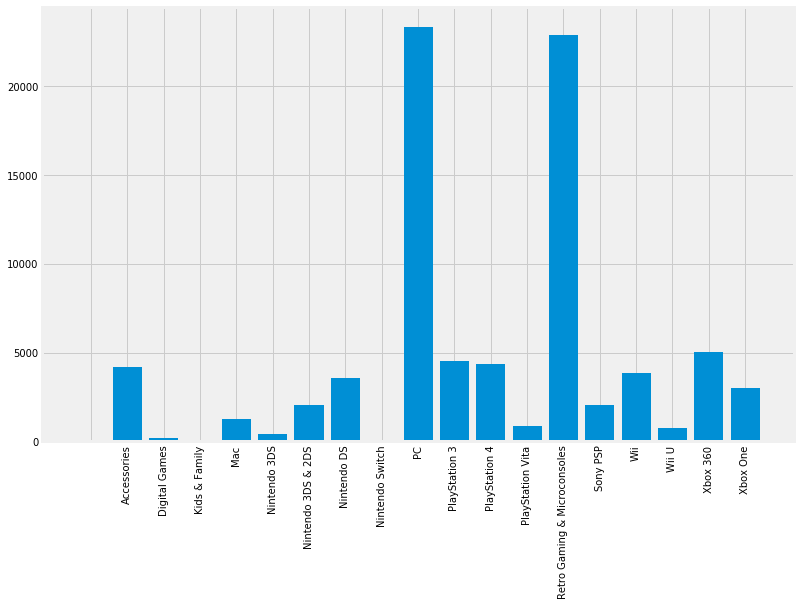

In [22]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
 
ax.bar(X,Y2)
ax.set_xticklabels(X, rotation='vertical')

plt.show() 

In [23]:
# combine similar category
C = []
for i in B:
    if i == 'PlayStation 3':
        C.append('PlayStation')
    elif i == 'PlayStation 4':
        C.append('PlayStation')
    elif i == 'PlayStation Vita':
        C.append('PlayStation')
    elif i == 'Sony PSP':
        C.append('PlayStation')
    elif i == 'Wii U':
        C.append('Wii')
    elif i == 'Xbox 360':
        C.append('Xbox')
    elif i == 'Xbox One':
        C.append('Xbox')
    elif i == 'Nintendo 3DS':
        C.append('Nintendo')
    elif i == 'Nintendo 3DS & 2DS':
        C.append('Nintendo')
    elif i == 'Nintendo DS':
        C.append('Nintendo')
    elif i == 'Nintendo Switch':
        C.append('Nintendo')
    else:
        C.append(i)

In [25]:
#Put it back into DataFrame
Metadata.loc[:,'cat2'] = C

In [29]:
Metadata.head()

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,...,tech1.Handle,tech1.Sheet Size,tech1.Brightness Rating,tech1.Paper Finish,tech1.Laser Beam Color,tech1.Wattage,tech1.Luminous Flux,tech1.Caster/Glide/Wheel Type,count,cat2
0,"[Video Games, PC, Games]",Reversi Sensory Challenger,[https://images-na.ssl-images-amazon.com/image...,Fidelity Electronics,">#2,623,937 in Toys & Games (See Top 100 in To...",Toys & Games,0042000742,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PC
1,"[Video Games, Xbox 360, Games, ]",Medal of Honor: Warfighter - Includes Battlefi...,[https://images-na.ssl-images-amazon.com/image...,by\n \n EA Games,">#67,231 in Video Games (See Top 100 in Video ...",Video Games,0078764343,[Brand new sealed!],[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Xbox
2,"[Video Games, Retro Gaming & Microconsoles, Su...",street fighter 2 II turbo super nintendo snes ...,NaN,Nintendo,">#134,433 in Video Games (See Top 100 in Video...",Video Games,0276425316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Retro Gaming & Microconsoles
3,"[Video Games, Xbox 360, Accessories, Controlle...",Xbox 360 MAS STICK,[https://images-na.ssl-images-amazon.com/image...,by\n \n MAS SYSTEMS,">#105,263 in Video Games (See Top 100 in Video...",Video Games,0324411812,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Xbox
4,"[Video Games, PC, Games, , Grades 2-12, Spelli...",Phonics Alive! 3: The Speller,[https://images-na.ssl-images-amazon.com/image...,by\n \n Advanced Software Pty. Ltd.,">#92,397 in Video Games (See Top 100 in Video ...",Video Games,0439335310,"[Phonics Alive! 3, The Speller teaches student...",NaN,[B000BCZ7U0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PC


In [30]:
#Combine 'reviews' and 'metadata' with only concerned variables
df = pd.merge(Review[['asin','overall','verified','timestamp','month','year', 'unixReviewTime','reviewerID', 'vote', 'count']],
              Metadata[['asin','cat2', 'rank','also_view','also_buy','price']],how='left')

In [32]:
# Export to csv
df.to_csv('final.csv', index=False)

# Load csv

In [4]:
df = pd.read_csv('final.csv')

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# dictionary for category's color
color_cat = {'PC':'#28005c',
             'Retro Gaming & Microconsoles':'#710060',
             'Mac':'#ab0057',
             'PlayStation':'#d61a44',
             'Nintendo':'#f15a29',
             'Accessories':'#f99300',
             'Xbox':'#eeca00',
             'Wii':'#ceff2e'}

In [6]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN


In [7]:
#convert timestamp to timestamp
df.loc[:,'timestamp'] = pd.to_datetime(df.loc[:,'timestamp'])

In [8]:
#check if there is review for the whole year of 2018

a = df[df['year']==2018]
set(a['month'])

#year 2018 only contains data from Jan to October
#if analyse data in annual term , need to cut out 2018

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

## Clean

In [9]:
#remove insignificant category
remove = df[df['cat2'] == 'Digital Games'].index
df.drop(remove,inplace=True)
remove2 = df[df['cat2'] == ''].index
df.drop(remove2,inplace=True)
remove3 = df[df['cat2'] == 'Kids & Family'].index
df.drop(remove3,inplace=True)
#remove not verified reviews
remove4 = df[df['verified']== False].index
df.drop(remove4,inplace=True)


In [10]:
# create min, max time reviews for each product
df0 = df.groupby('asin')['timestamp'].agg(['min','max']).reset_index()

#convert to timestamp
df0.loc[:,'min'] = pd.to_datetime(df0.loc[:,'min'])
df0.loc[:,'max'] = pd.to_datetime(df0.loc[:,'max'])

In [11]:
# create new column for the lifespan of product's review
df0.loc[:,'delta'] = df0['max'] - df0['min']

In [12]:
#merge back to df by asin
df = pd.merge(df,df0, how='left')

In [13]:
#remove products that lifespan didn't exceed 6months (182 days)
remove0 = df[df['delta'].dt.days < 182].index

df.drop(remove0, inplace=True)

## Plot

### 1

In [14]:
#create new duration for each review, meaning how old is the review after that asin's first review
df.loc[:,'duration'] = df['timestamp'] - df['min']

In [15]:
#remove reviews that is older than 6months to include only reviews for product at initial stage( first 6months)
remove5 = df[df['duration'].dt.days > 182].index
df0 = df.drop(remove5)

#remove first day of product's review (day0) which counts as starting point (min),
#since the number of review on this day is exceedingly high
remove6 = df0[df0['duration'].dt.days < 1].index
df0 = df0.drop(remove6)

In [16]:
#convert duration from year to month
df0.loc[:,'duration_month'] = round(df0['duration'] / np.timedelta64(1,'M'),0)

In [17]:
df0.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,duration_month
80,0700099867,5.0,True,2011-08-14,8,2011,1313280000,AN3YYDZAS3O1Y,11,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,61 days,2.0
81,0700099867,4.0,True,2011-07-27,7,2011,1311724800,A3BQMSVKFEZHLU,NaN,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,43 days,1.0
99,0700026398,2.0,True,2013-09-27,9,2013,1380240000,A2IPY9UTB8JEU5,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,132 days,4.0
100,0700026398,5.0,True,2013-09-04,9,2013,1378252800,A2ICCE41Z2LWZ5,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,109 days,4.0
101,0700026398,4.0,True,2013-06-26,6,2013,1372204800,A1DQYK20U6BP0V,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,39 days,1.0


In [18]:
dff = pd.DataFrame(df0.groupby(['cat2','asin','duration_month'])['count'].agg(np.sum)).reset_index()

dff = pd.DataFrame(dff.groupby(['cat2', 'duration_month'])['count'].agg(np.mean)).reset_index()

In [19]:
dff.head()

,cat2,duration_month,count
0,Accessories,0.0,1.477745
1,Accessories,1.0,1.992495
2,Accessories,2.0,2.392193
3,Accessories,3.0,2.669104
4,Accessories,4.0,2.391389


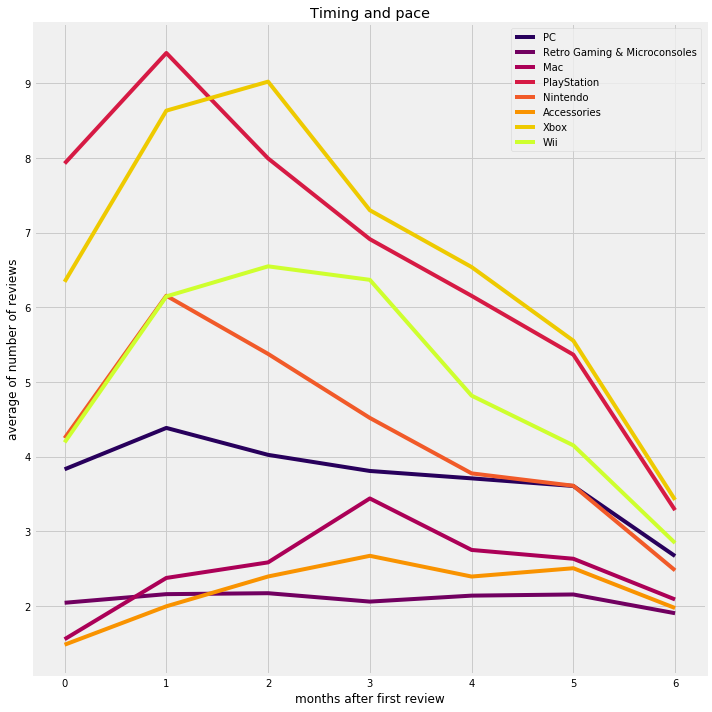

In [20]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(111)

for i in color_cat:
    a = dff[dff['cat2'] == i]
    x = a['duration_month']
    y = a['count']
    ax.plot(x,y, label=i,color= color_cat[i])



ax.set_title('Timing and pace')
ax.set_xlabel('months after first review')
ax.set_ylabel('average of number of reviews')
ax.legend(loc='best')
    
fig.tight_layout()
plt.show()
#fig.savefig('1', transparent=True)

### 1.2

In [21]:
#plot only for last 3 years
remove7 = df0[df0['year'] <2016].index
df0 = df0.drop(remove7)

In [22]:
dff2 = pd.DataFrame(df0.groupby(['cat2','asin','duration_month'])['count'].agg(np.sum)).reset_index()

dff2 = pd.DataFrame(dff2.groupby(['cat2', 'duration_month'])['count'].agg(np.mean)).reset_index()

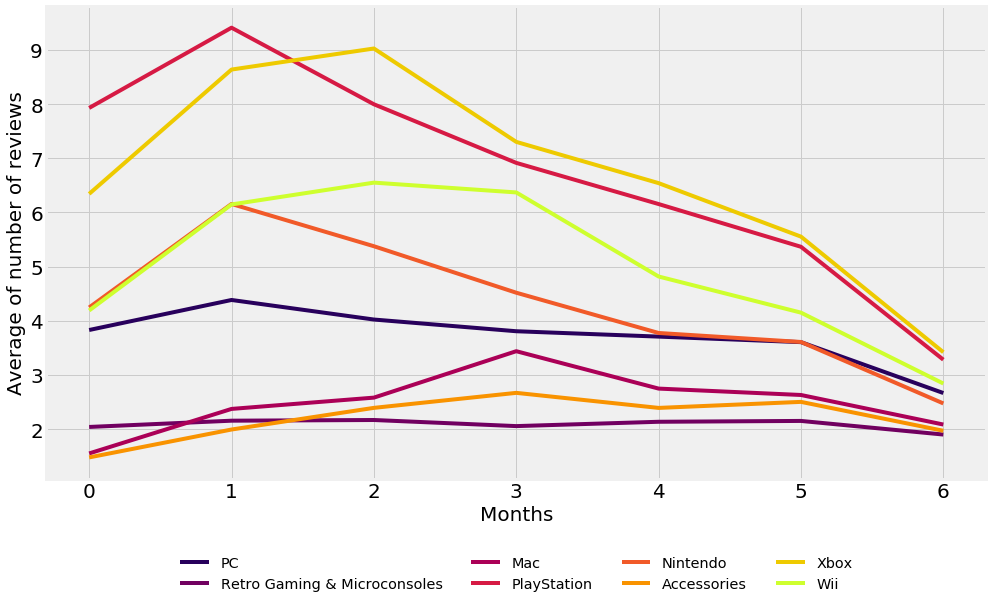

In [23]:
fig = plt.figure(figsize=(15,13))

gs = gridspec.GridSpec(2, 1,
                       figure=fig,
                       hspace=0.3, wspace=0,
                       height_ratios=[10, 3])

ax = fig.add_subplot(gs[0,0])

for i in color_cat:
    a = dff[dff['cat2'] == i]
    x = a['duration_month']
    y = a['count']
    ax.plot(x,y, label=i,color= color_cat[i])



#ax.set_title('Timing and pace from 2016 to 2018')
ax.set_xlabel('Months')
ax.set_ylabel('Average of number of reviews')
ax.legend(bbox_to_anchor=(0.5,-0.2),ncol=4, fontsize='x-large', loc='center',frameon=False)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    

plt.show()
fig.savefig('1', transparent=True)

### stacked barchart

In [24]:
remove8 = df[df['duration'].dt.days > 182].index

df1 = df.drop(remove8)

In [25]:
df1 = pd.DataFrame(df1.groupby(['cat2','year'])['count'].agg(np.sum)).reset_index()

In [26]:
df1

,cat2,year,count
0,Accessories,2001,2
1,Accessories,2006,7
2,Accessories,2007,40
3,Accessories,2008,176
4,Accessories,2009,211
...,...,...,...
123,Xbox,2014,20570
124,Xbox,2015,25785
125,Xbox,2016,24649
126,Xbox,2017,6406


In [27]:
#create all possible category and year and fill 'count' with zeros
cat = set(df1['cat2'])

a = [i for i in cat for k in range(20)]
b = [i for k in range(8) for i in np.arange(1999,2019,1)]
c = [0 for k in range(160)]

d = {
    'cat2': a,
    'year': b,
    'count': c
}

d = pd.DataFrame(d)

In [28]:
#combine dataframe
dff1 =pd.concat([df1,d],axis=0)

In [29]:
dff1 = pd.DataFrame(dff1.groupby(['cat2', 'year'])['count'].agg(np.sum)).reset_index()

In [30]:
dff1

,cat2,year,count
0,Accessories,1999,0
1,Accessories,2000,0
2,Accessories,2001,2
3,Accessories,2002,0
4,Accessories,2003,0
...,...,...,...
155,Xbox,2014,20570
156,Xbox,2015,25785
157,Xbox,2016,24649
158,Xbox,2017,6406


In [31]:
a = dff1[dff1['cat2'] == 'PC']
x = np.array(a['year'])
y = np.array(a['count'])


a = dff1[dff1['cat2'] == 'Retro Gaming & Microconsoles']
x2 = np.array(a['year'])
y2 = np.array(a['count'])

a = dff1[dff1['cat2'] == 'Mac']
x3 = np.array(a['year'])
y3 = np.array(a['count'])

a = dff1[dff1['cat2'] == 'PlayStation']
x4 = np.array(a['year'])
y4 = np.array(a['count'])


a = dff1[dff1['cat2'] == 'Nintendo']
x5 = np.array(a['year'])
y5 = np.array(a['count'])


a = dff1[dff1['cat2'] == 'Accessories']
x6 = np.array(a['year'])
y6 = np.array(a['count'])

a = dff1[dff1['cat2'] == 'Xbox']
x7 = np.array(a['year'])
y7 = np.array(a['count'])

a = dff1[dff1['cat2'] == 'Wii']
x8 = np.array(a['year'])
y8 = np.array(a['count'])

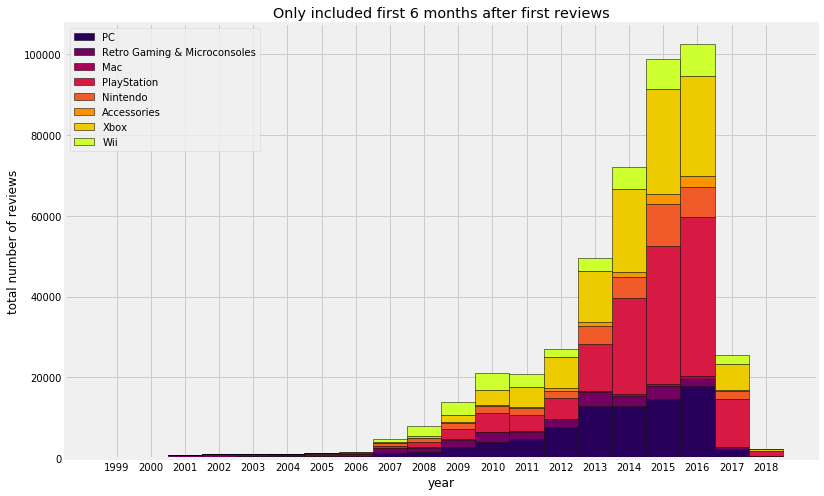

In [32]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, xticks=x, xticklabels =x)


ax.bar(x,y, width=1, label='PC', color=color_cat['PC'], ec='k')
ax.bar(x2,y2, width=1, bottom=y, label='Retro Gaming & Microconsoles',color=color_cat['Retro Gaming & Microconsoles'], ec='k')
ax.bar(x3,y3, width=1, bottom=y2+y, label='Mac',color=color_cat['Mac'], ec='k')
ax.bar(x4,y4, width=1, bottom=y3+y+y2, label='PlayStation',color=color_cat['PlayStation'], ec='k')
ax.bar(x5,y5, width=1, bottom=y4+y+y2+y3, label='Nintendo',color=color_cat['Nintendo'], ec='k')
ax.bar(x6,y6, width=1, bottom=y5+y+y2+y3+y4, label='Accessories',color=color_cat['Accessories'], ec='k')
ax.bar(x7,y7, width=1, bottom=y6+y+y2+y3+y4+y5, label='Xbox',color=color_cat['Xbox'], ec='k')
ax.bar(x8,y8, width=1, bottom=y7+y+y2+y3+y4+y5+y6, label='Wii',color=color_cat['Wii'], ec='k')


ax.legend(loc='best')
ax.set_xlabel('year')
ax.set_ylabel('total number of reviews')
ax.set_title('Only included first 6 months after first reviews')

    
plt.show()
#fig.savefig('2')

In [33]:
#create aggregate value for log plot
a = pd.DataFrame(df.groupby('year')['count'].agg(np.sum)).reset_index()
X = a['year']
Y = a['count']

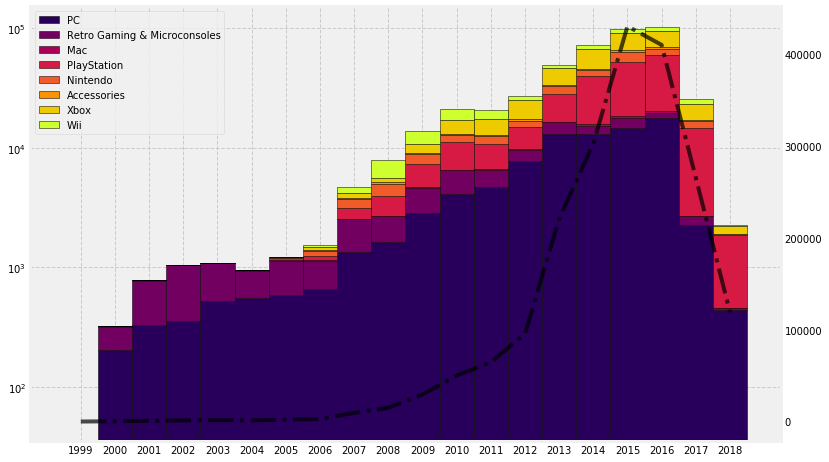

In [34]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, xticks=x, xticklabels =x)


ax.bar(x,y, width=1, label='PC', color=color_cat['PC'], ec='k')
ax.bar(x2,y2, width=1, bottom=y, label='Retro Gaming & Microconsoles',color=color_cat['Retro Gaming & Microconsoles'], ec='k')
ax.bar(x3,y3, width=1, bottom=y2+y, label='Mac',color=color_cat['Mac'], ec='k')
ax.bar(x4,y4, width=1, bottom=y3+y+y2, label='PlayStation',color=color_cat['PlayStation'], ec='k')
ax.bar(x5,y5, width=1, bottom=y4+y+y2+y3, label='Nintendo',color=color_cat['Nintendo'], ec='k')
ax.bar(x6,y6, width=1, bottom=y5+y+y2+y3+y4, label='Accessories',color=color_cat['Accessories'], ec='k')
ax.bar(x7,y7, width=1, bottom=y6+y+y2+y3+y4+y5, label='Xbox',color=color_cat['Xbox'], ec='k')
ax.bar(x8,y8, width=1, bottom=y7+y+y2+y3+y4+y5+y6, label='Wii',color=color_cat['Wii'], ec='k')
ax.grid(ls='--')

ax.legend(loc='best')
ax.set_yscale('log')

ax2 = ax.twinx()
ax2.plot(X,Y,color='k',alpha=0.7,ls='-.')
ax2.grid(ls='')

plt.show()

In [35]:
#transform y into %
total = y+y2+y3+y4+y5+y6+y7+y8
y_percnt = y/total
y_percnt2 = y2/total
y_percnt3 = y3/total
y_percnt4 = y4/total
y_percnt5 = y5/total
y_percnt6 = y6/total
y_percnt7 = y7/total
y_percnt8 = y8/total

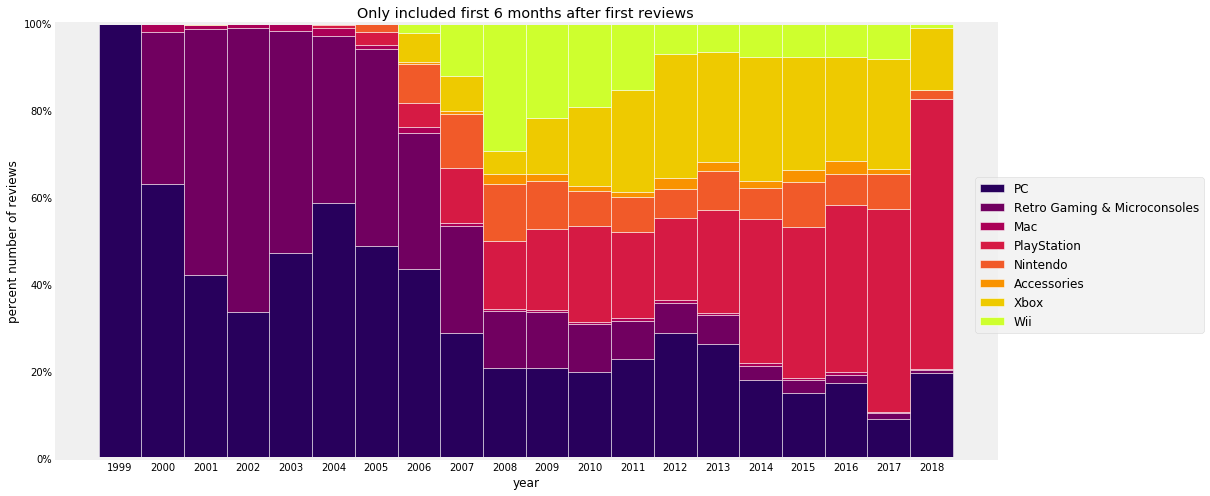

In [36]:
fig = plt.figure(figsize=(18,8))

gs = gridspec.GridSpec(3, 2,
                       figure=fig,
                       hspace=0.3, wspace=0,
                       width_ratios=[10, 2],
                       height_ratios=[1, 1, 1])


ax = fig.add_subplot(gs[0:3,0], xticks=x, xticklabels =x, yticklabels=['0%','20%','40%','60%','80%','100%'])

ax.bar(x,y_percnt, width=1,
       label='PC', color=color_cat['PC'], ec='white')
ax.bar(x2,y_percnt2, width=1, bottom=y_percnt,
       label='Retro Gaming & Microconsoles', color=color_cat['Retro Gaming & Microconsoles'], ec='white')
ax.bar(x3,y_percnt3, width=1, bottom=y_percnt2+y_percnt,
       label='Mac', color=color_cat['Mac'], ec='white')
ax.bar(x4,y_percnt4, width=1, bottom=y_percnt3+y_percnt+y_percnt2,
       label='PlayStation', color=color_cat['PlayStation'], ec='white')
ax.bar(x5,y_percnt5, width=1, bottom=y_percnt4+y_percnt+y_percnt2+y_percnt3,
       label='Nintendo', color=color_cat['Nintendo'], ec='white')
ax.bar(x6,y_percnt6, width=1, bottom=y_percnt5+y_percnt+y_percnt2+y_percnt3+y_percnt4,
       label='Accessories', color=color_cat['Accessories'], ec='white')
ax.bar(x7,y_percnt7, width=1, bottom=y_percnt6+y_percnt+y_percnt2+y_percnt3+y_percnt4+y_percnt5,
       label='Xbox', color=color_cat['Xbox'], ec='white')
ax.bar(x8,y_percnt8, width=1, bottom=y_percnt7+y_percnt+y_percnt2+y_percnt3+y_percnt4+y_percnt5+y_percnt6,
       label='Wii', color=color_cat['Wii'], ec='white')

ax.grid('')
ax.set_xlabel('year')
ax.set_ylabel('percent number of reviews')
ax.set_title('Only included first 6 months after first reviews')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.66), ncol=1, fontsize='large')
    
plt.show()
#fig.savefig('2-1')

In [37]:
# convert from annually to half annually
dff1_2 = df[['cat2','timestamp','count','duration']]
dff1_2.drop(dff1_2[dff1_2['duration'].dt.days > 182].index, inplace=True)
dff1_2 = pd.DataFrame(dff1_2.groupby(['cat2', pd.Grouper(key='timestamp', freq='6M'),])['count'].agg(np.sum)).reset_index()

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
#drop last 6moths since 2018 dont have data for month10,11,12
dff1_2.drop(dff1_2[dff1_2['timestamp'] == pd.to_datetime('2018-11-30')].index, inplace=True)

In [39]:
cat = set(dff1_2['cat2'])

a = [i for i in cat for k in range(38)]
b = [i for k in range(8) for i in set(dff1_2['timestamp'])]
c = [0 for k in range(304)]

d = {
    'cat2': a,
    'timestamp': b,
    'count': c
}

d = pd.DataFrame(d)

In [40]:
dff1_2 =pd.concat([dff1_2,d],axis=0)
dff1_2 = pd.DataFrame(dff1_2.groupby(['cat2', pd.Grouper(key='timestamp', freq='6M')])['count'].agg(np.sum).reset_index())

In [41]:
a = dff1_2[dff1_2['cat2'] == 'PC']
x_2 = a['timestamp']
y_2 = np.array(a['count'])


a = dff1_2[dff1_2['cat2'] == 'Retro Gaming & Microconsoles']
x2_2 = a['timestamp']
y2_2 = np.array(a['count'])

a = dff1_2[dff1_2['cat2'] == 'Mac']
x3_2 = a['timestamp']
y3_2 = np.array(a['count'])

a = dff1_2[dff1_2['cat2'] == 'PlayStation']
x4_2 = a['timestamp']
y4_2 = np.array(a['count'])


a = dff1_2[dff1_2['cat2'] == 'Nintendo']
x5_2 = a['timestamp']
y5_2 = np.array(a['count'])


a = dff1_2[dff1_2['cat2'] == 'Accessories']
x6_2 = a['timestamp']
y6_2 = np.array(a['count'])

a = dff1_2[dff1_2['cat2'] == 'Xbox']
x7_2 = a['timestamp']
y7_2 = np.array(a['count'])

a = dff1_2[dff1_2['cat2'] == 'Wii']
x8_2 = a['timestamp']
y8_2 = np.array(a['count'])

In [42]:
#transform y into %
total = y_2+y2_2+y3_2+y4_2+y5_2+y6_2+y7_2+y8_2
y_percnt_2 = y_2/total
y_percnt2_2 = y2_2/total
y_percnt3_2 = y3_2/total
y_percnt4_2 = y4_2/total
y_percnt5_2 = y5_2/total
y_percnt6_2 = y6_2/total
y_percnt7_2 = y7_2/total
y_percnt8_2 = y8_2/total

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


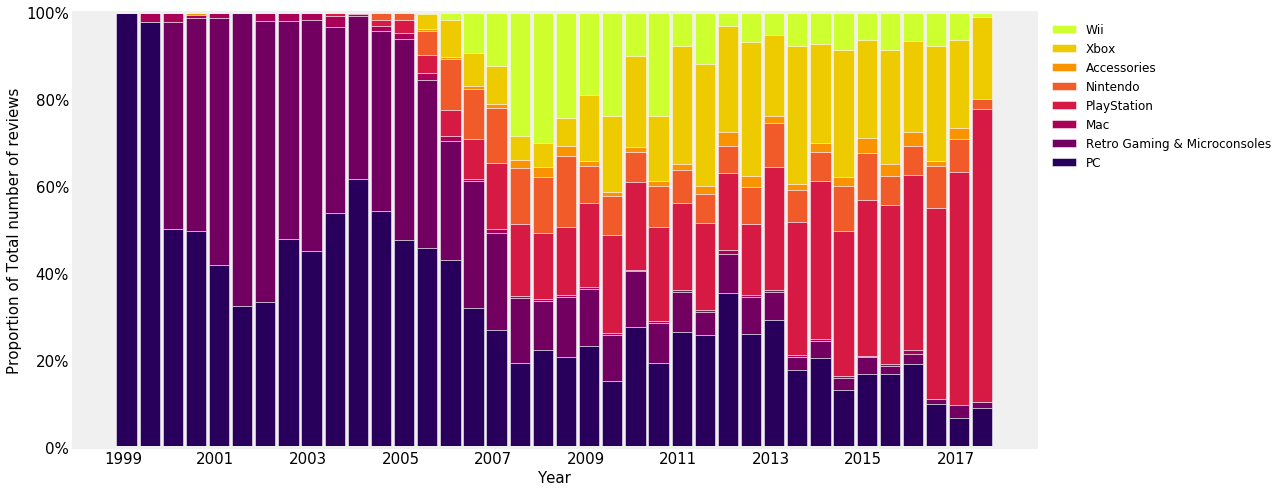

In [43]:
fig =plt.figure(figsize=(20,8))

gs = gridspec.GridSpec(3, 2,
                       figure=fig,
                       hspace=0.3, wspace=0,
                       width_ratios=[10, 3],
                       height_ratios=[1, 1, 1])


ax = fig.add_subplot(gs[0:3,0], yticklabels=['0%','20%','40%','60%','80%','100%'])

ax.xaxis.set_major_locator(MonthLocator(interval=24))                          
ax.xaxis.set_major_formatter(DateFormatter("%Y"))


ax.bar(x8_2,y_percnt8_2, width=160, bottom=y_percnt7_2+y_percnt_2+y_percnt2_2+y_percnt3_2+y_percnt4_2+y_percnt5_2+y_percnt6_2,
       label='Wii', color=color_cat['Wii'], ec='white')
ax.bar(x7_2,y_percnt7_2, width=160, bottom=y_percnt6_2+y_percnt_2+y_percnt2_2+y_percnt3_2+y_percnt4_2+y_percnt5_2,
       label='Xbox', color=color_cat['Xbox'], ec='white')
ax.bar(x6_2,y_percnt6_2, width=160, bottom=y_percnt5_2+y_percnt_2+y_percnt2_2+y_percnt3_2+y_percnt4_2,
       label='Accessories', color=color_cat['Accessories'], ec='white')
ax.bar(x5_2,y_percnt5_2, width=160, bottom=y_percnt4_2+y_percnt_2+y_percnt2_2+y_percnt3_2,
       label='Nintendo', color=color_cat['Nintendo'], ec='white')
ax.bar(x4_2,y_percnt4_2, width=160, bottom=y_percnt3_2+y_percnt_2+y_percnt2_2,
       label='PlayStation', color=color_cat['PlayStation'], ec='white')
ax.bar(x3_2,y_percnt3_2, width=160, bottom=y_percnt2_2+y_percnt_2,
       label='Mac', color=color_cat['Mac'], ec='white')
ax.bar(x2_2,y_percnt2_2, width=160, bottom=y_percnt_2,
       label='Retro Gaming & Microconsoles', color=color_cat['Retro Gaming & Microconsoles'], ec='white')
ax.bar(x_2,y_percnt_2, width=160,
       label='PC', color=color_cat['PC'], ec='white')


ax.grid('')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Total number of reviews')
#ax.set_title('Only included first 6 months after first reviews')
ax.legend(loc='upper center', bbox_to_anchor=(1.13, 1), ncol=1, fontsize='large', frameon=False)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

fig.tight_layout()
plt.show()
fig.savefig('2-2', transparent=True)

### Rank

In [44]:
#clean column'rank'
dfnew = df['rank'].str.split('>',n=1,expand=True)

dfnew = dfnew[1].str.split('#', n=1, expand=True)

dfnew = dfnew[1].str.split(' ', n=1, expand=True)

In [45]:
#use only first number (total rank of gaming)
dfnew = pd.DataFrame(dfnew[0])

In [46]:
#create as 'rank2'
dfnew.loc[:,'rank2'] = dfnew[0]

In [47]:
#drop old column
dfnew.drop(0, axis=1, inplace=True)

In [48]:
dfnew.head()

,rank2
0,"5,927"
1,"5,927"
2,"5,927"
3,"5,927"
4,"5,927"


In [49]:
# concat back to main dataframe
df = pd.concat([df,dfnew], axis=1)

In [50]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,rank2
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,588 days,"5,927"
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,558 days,"5,927"
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,466 days,"5,927"
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,466 days,"5,927"
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2018-03-17,1965 days,444 days,"5,927"


In [51]:
# need to convert rank2 from object to integer

In [52]:
#creae new dataframe
dfnew2 = pd.DataFrame(df[['asin','overall','rank2','count','cat2']])
dfnew2.head()

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC


In [53]:
#drop na
dfnew2.dropna(inplace=True)

In [54]:
# split comma which is string
a = dfnew2['rank2'].str.split(',')


#combine back after split the comma
b= []
for i in a:
    if len(i) == 2:
        b.append(int(i[0]+i[1]))
    elif len(i) ==3:
        b.append(int(i[0]+i[1]+i[2]))
    else:
        b.append(int(i[0]))

In [55]:
#create final dataframe
b = pd.DataFrame(b, columns=['rank2'])
#check for integer
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950717 entries, 0 to 1950716
Data columns (total 1 columns):
rank2    int64
dtypes: int64(1)
memory usage: 14.9 MB


In [56]:
#drop non-integer column of rank2
dfnew2.drop(['rank2'],axis=1,inplace=True)

In [57]:
#reset index
dfnew2.reset_index(inplace=True)
b.reset_index(inplace=True)

In [58]:
dfnew2

,index,asin,overall,count,cat2
0,0,0439381673,1.0,1,PC
1,1,0439381673,3.0,1,PC
2,2,0439381673,4.0,1,PC
3,3,0439381673,1.0,1,PC
4,4,0439381673,4.0,1,PC
...,...,...,...,...,...
1950712,2056876,B01HJEBIAA,5.0,1,PC
1950713,2056877,B01HJEBIAA,5.0,1,PC
1950714,2056878,B01HJEBIAA,5.0,1,PC
1950715,2056879,B01HJEBIAA,5.0,1,PC


In [59]:
#combine back
dfnew2 = pd.concat([dfnew2,b], axis=1)

In [60]:
dfnew2.head()

,index,asin,overall,count,cat2,index,rank2
0,0,0439381673,1.0,1,PC,0,5927
1,1,0439381673,3.0,1,PC,1,5927
2,2,0439381673,4.0,1,PC,2,5927
3,3,0439381673,1.0,1,PC,3,5927
4,4,0439381673,4.0,1,PC,4,5927


In [61]:
#sort rank and drop duplicate
dfnew3 = dfnew2.sort_values('rank2')
dfnew3.drop_duplicates(['asin'], inplace=True)

# create new column with reversed rank
dfnew3.loc[:,'rank3'] = dfnew3['rank2'].values[::-1]

In [62]:
# count as number of reviews
dfnew2.loc[:,'count'] = dfnew2.groupby('asin')['count'].transform(np.sum)
dfnew2.drop_duplicates(['asin'], inplace=True)

In [63]:
dfnew2

,index,asin,overall,count,cat2,index,rank2
0,0,0439381673,1.0,42,PC,0,5927
36,36,0700026657,4.0,53,PC,36,30230
80,80,0700099867,5.0,78,PC,80,50093
83,83,0700026398,1.0,18,PC,83,58163
157,402,1616616873,5.0,11,PC,157,69172
...,...,...,...,...,...,...,...
1950605,2056733,B01HHT4BHE,5.0,2,PlayStation,1950605,97736
1950607,2056740,B01HHTH6S0,1.0,5,PlayStation,1950607,73207
1950645,2056782,B01HI3JA8O,5.0,6,Mac,1950645,191
1950692,2056850,B01HJ14TTA,5.0,3,PlayStation,1950692,62150


In [64]:
#count2 as number of asin inside each category
dfnew2.loc[:,'count2'] = 1

In [66]:
dfnew2

,index,asin,overall,count,cat2,index,rank2,count2
0,0,0439381673,1.0,42,PC,0,5927,1
36,36,0700026657,4.0,53,PC,36,30230,1
80,80,0700099867,5.0,78,PC,80,50093,1
83,83,0700026398,1.0,18,PC,83,58163,1
157,402,1616616873,5.0,11,PC,157,69172,1
...,...,...,...,...,...,...,...,...
1950605,2056733,B01HHT4BHE,5.0,2,PlayStation,1950605,97736,1
1950607,2056740,B01HHTH6S0,1.0,5,PlayStation,1950607,73207,1
1950645,2056782,B01HI3JA8O,5.0,6,Mac,1950645,191,1
1950692,2056850,B01HJ14TTA,5.0,3,PlayStation,1950692,62150,1


In [67]:
dfnew3

,index,asin,overall,count,cat2,index,rank2,rank3
1600254,1651260,B01FZ3BR5S,4.0,1,PC,1600254,1,14986784
1431310,1476884,B012DFI02O,4.0,1,PC,1431310,1,10949102
1925501,2025358,B016MAK38U,5.0,1,PC,1925501,1,10038572
1528390,1576616,B019OB663A,4.0,1,PC,1528390,1,8099995
1898854,1992879,B00RSXRLUE,5.0,1,Wii,1898854,1,7196466
...,...,...,...,...,...,...,...,...
1858822,1942831,B005H0R3OO,5.0,1,PC,1858822,7196466,1
1820577,1896587,B005G36ST8,5.0,1,PC,1820577,8099995,1
1823877,1900752,B005TFPYUW,5.0,1,PC,1823877,10038572,1
1794989,1866005,B002YXJ9KS,4.0,1,Accessories,1794989,10949102,1


In [68]:
dfnewfinal = pd.merge(dfnew2[['asin','overall','count','count2','cat2','rank2']],dfnew3[['asin','rank3']], how= 'outer')
gr_cat2 = dfnewfinal.groupby('cat2')

In [69]:
dfnewfinal.loc[:,'count'] = pd.DataFrame(gr_cat2['count'].transform(np.mean))
dfnewfinal.loc[:,'count2'] = pd.DataFrame(gr_cat2['count2'].transform(np.sum))
dfnewfinal.loc[:,'rank3'] = pd.DataFrame(gr_cat2['rank3'].transform(np.median))
dfnewfinal.loc[:,'overall'] = pd.DataFrame(gr_cat2['overall'].transform(np.mean))
dfnewfinal.drop_duplicates(['cat2'], inplace=True)

In [72]:
dfnewfinal

,asin,overall,count,count2,cat2,rank2,rank3
0,0439381673,3.621383,42.682463,10298,PC,5927,32879.0
5,3828770193,4.158259,39.876607,4044,Nintendo,38864,44911.0
6,6050036071,3.996785,62.275891,7155,PlayStation,3867,47411.0
8,7293000936,3.935824,59.185598,3319,Wii,44739,50196.0
9,7543450933,4.153270,28.373669,9206,Retro Gaming & Microconsoles,20718,45525.5
15,952590444X,3.830055,18.972769,1983,Accessories,4673,14980.0
16,9625990674,3.935668,75.850019,5254,Xbox,48848,52528.5
349,B00002S6BL,3.085106,22.434043,470,Mac,62771,24361.5


In [80]:
x_rank = np.array(dfnewfinal['count'])
y_rank = np.array(dfnewfinal['rank3'])
size_rank = np.array(dfnewfinal['count2'])
cat_rank = np.array(dfnewfinal['cat2'])

In [158]:
m_00 = smf.ols('rank3 ~ count',
              data = dfnewfinal)

m_0_res0 = m_00.fit()

print(m_0_res0.summary())

                            OLS Regression Results                            
Dep. Variable:                  rank3   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     10.68
Date:                Sat, 09 Nov 2019   Prob (F-statistic):             0.0171
Time:                        16:47:41   Log-Likelihood:                -82.842
No. Observations:                   8   AIC:                             169.7
Df Residuals:                       6   BIC:                             169.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.595e+04   7735.451      2.062      0.0

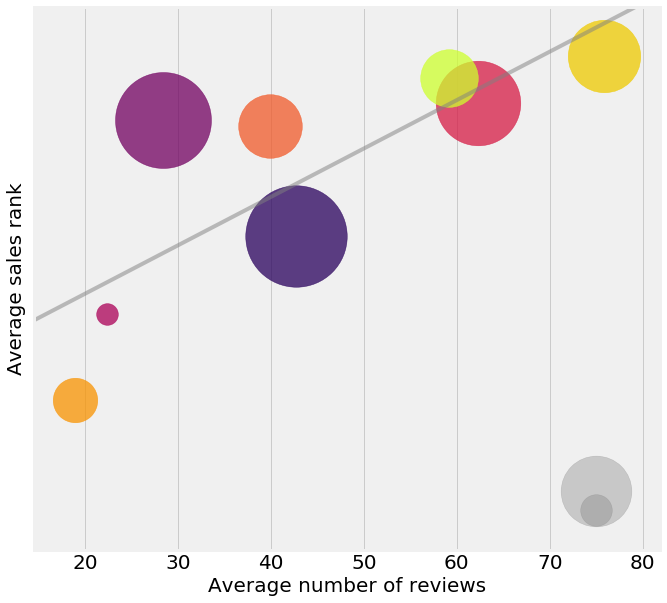

In [162]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, yticklabels=[])

for i in np.arange(0,8,1):
    ax.scatter(x_rank[i],y_rank[i], alpha=0.75, marker='o', label=cat_rank[i],s=size_rank[i],color = color_cat[cat_rank[i]])


ax.scatter(75,5000, color='grey', alpha=0.35, s=5000)
ax.scatter(75,2900, color='grey', alpha=0.35, s=1000)
    
ax.set_xlabel('Average number of reviews')
ax.set_ylabel('Average sales rank')
ax.grid(axis='y')

#legend = ax.legend(loc=4, fontsize='x-large')
#for i in np.arange(0,8,1):
#    legend.legendHandles[i]._sizes = [40]

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)    
   
fig = abline_plot(intercept = m_0_res0.params['Intercept'],
        slope = m_0_res0.params['count'], ax=ax, color='grey', alpha=0.5,
                  label='');
    
fig.tight_layout
plt.show()
fig.savefig('3')

Ordinal variable is better fitted using 'median' than mean or mode

https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

### Network (also_buy, also_view)

In [127]:
df_net = df[['also_buy','also_view','asin', 'cat2']]

cat = df_net[df_net['cat2'] != 'PlayStation'].index
df_net.drop(cat,inplace=True)

In [128]:
df_net.drop_duplicates(inplace=True)

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
asin = df_net['asin']

also_buy = list(df_net['also_buy'])
also_view = list(df_net['also_view'])  
node_list = list(asin)


In [130]:
edge_list = []     
for product, buy in zip(asin,also_buy):
    if type(buy) == str:
        buy = [a.strip() for a in buy.split(',')]
        if type(buy) == list:
            for buy2 in buy:
                buy2 = buy2.strip('[')
                buy2 = buy2.strip(']')
                buy2 = buy2.strip("\\'")
                buy2 = buy2.strip("\\'")
                
                if buy2 in node_list:
                    edge_list.append([product,buy2])
                if buy2 not in node_list:
                    pass
    else:
        pass


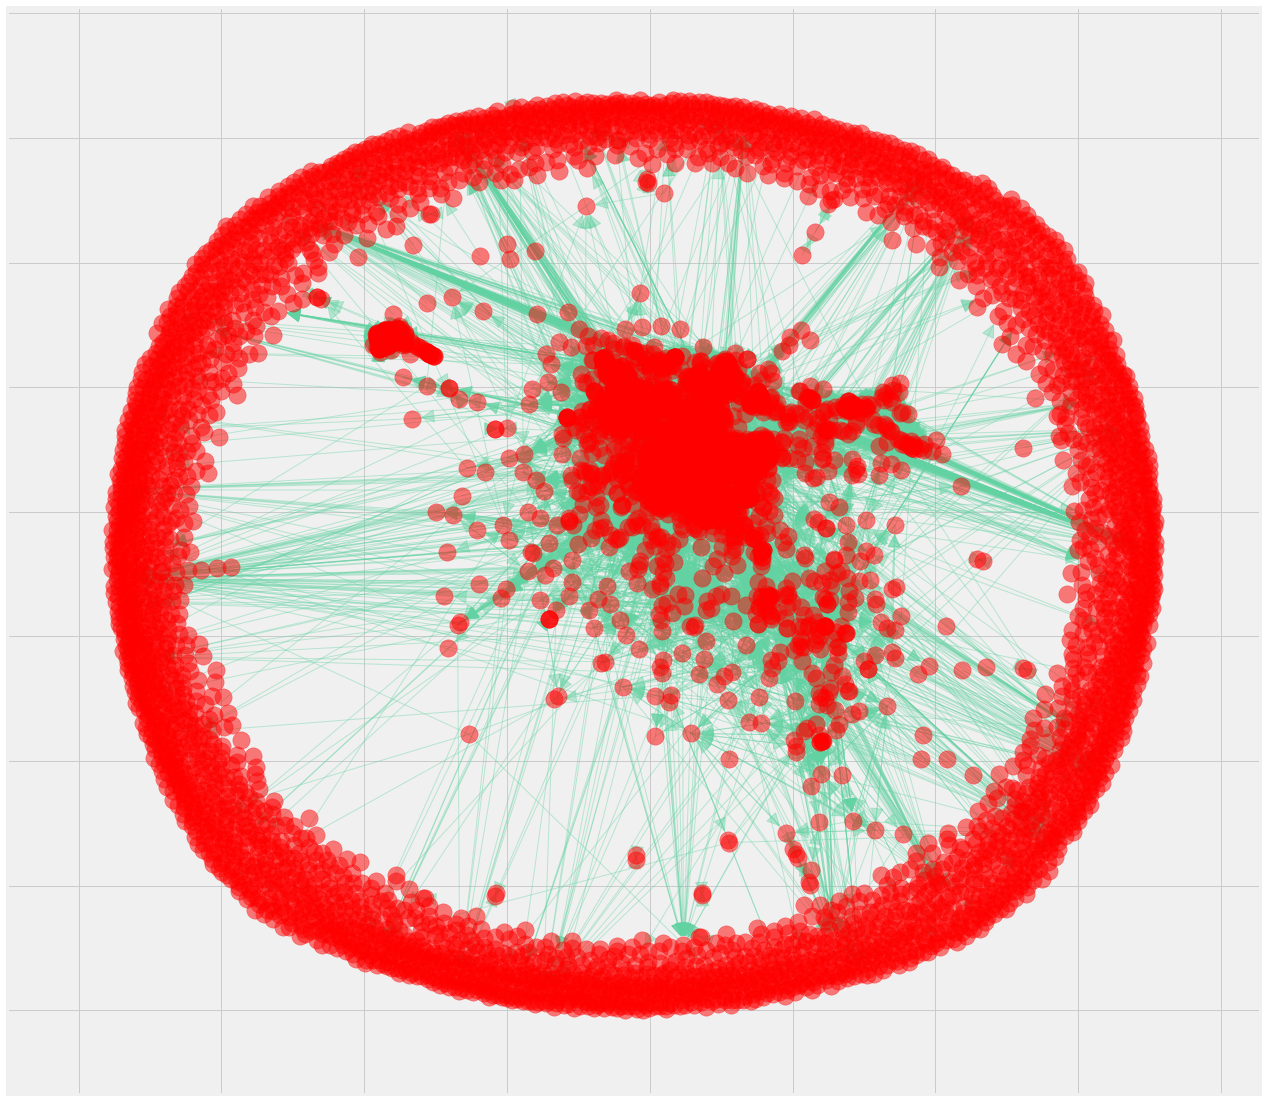

In [131]:

G = nx.DiGraph()

G.add_nodes_from(node_list)
G.add_edges_from(edge_list)


fig = plt.figure(figsize=(20,20))

pos = nx.layout.spring_layout(G)

# draw nodes
nodes = nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color='red', alpha=0.5)

# draw arrows
edges = nx.draw_networkx_edges(G, pos, edgelist=edge_list,edge_color='#62d2a2', rrowstyle='->',
                               arrowsize=30,alpha=0.4, width=1)



In [132]:
in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
in_degreeCount = collections.Counter(in_degree_sequence)
indeg, incnt = zip(*in_degreeCount.items())


In [133]:
node_list2 = list(asin)
edge_list2 = []
for product, view in zip(asin,also_view):
    if type(view) == str:
        view = [a.strip() for a in view.split(',')]
        if type(view) == list:
            for view2 in view:
                view2 = view2.strip('[')
                view2 = view2.strip(']')
                view2 = view2.strip("\\'")
                view2 = view2.strip("\\'")
                
                if view2 in node_list2:
                    edge_list.append([product,view2])
                if view2 not in node_list2:
                    pass
    else:
        pass


In [134]:
G2 = nx.DiGraph()

G2.add_nodes_from(node_list2)
G2.add_edges_from(edge_list2)


fig = plt.figure(figsize=(20,20))


<Figure size 1440x1440 with 0 Axes>

In [135]:

in_degree_sequence2 = sorted([d for n, d in G2.in_degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
in_degreeCount2 = collections.Counter(in_degree_sequence2)
indeg2, incnt2 = zip(*in_degreeCount2.items())

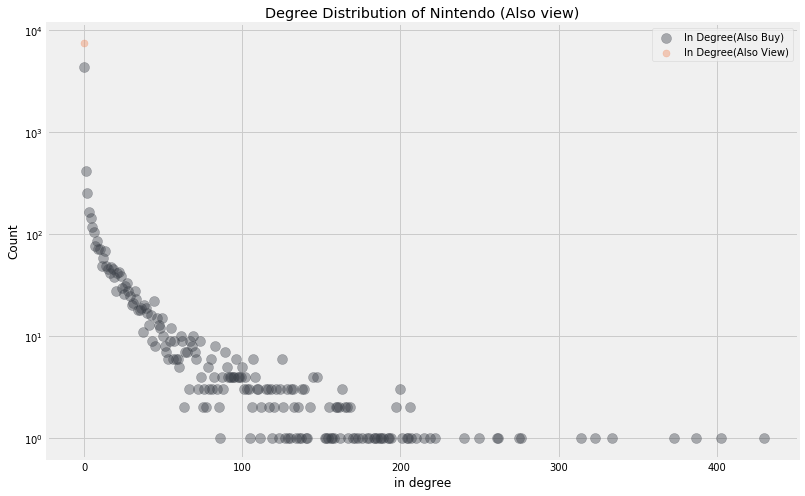

In [136]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incnt, s=100, color='#393e46', alpha=0.4, label='In Degree(Also Buy)')
plt.scatter(indeg2, incnt2,s=50, color='#f08a5d', alpha=0.4, label='In Degree(Also View)')

ax.set_title("Degree Distribution of Nintendo (Also view)")
ax.set_ylabel("Count")
ax.set_xlabel("in degree")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.legend(loc='best')

plt.show()

In [137]:
# convert count to p(k)
inc = np.sum(incnt)
inc2 = np.sum(incnt2)

incntp = [i/inc for i in incnt]
incntp2 = [i/inc2 for i in incnt2]

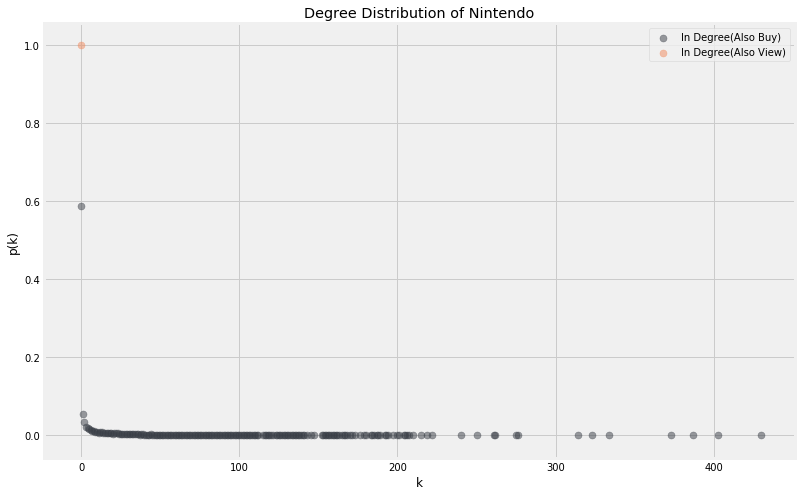

In [138]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

plt.scatter(indeg, incntp, s=50, color='#393e46', alpha=0.5, label='In Degree(Also Buy)')
plt.scatter(indeg2, incntp2,s=50, color='#f08a5d', alpha=0.5, label='In Degree(Also View)')

ax.set_title("Degree Distribution of Nintendo")
ax.set_ylabel("p(k)")
ax.set_xlabel("k")
ax.legend(loc='best')

plt.show()

In [139]:
d = G.in_degree()
d2 = G2.in_degree()

In [140]:
D = pd.DataFrame(d, columns=['asin','in_degree_buy'])
D2 = pd.DataFrame(d2, columns=['asin','in_degree_view'])

In [141]:
D = pd.merge(D,D2,how='outer')

In [142]:
D3 = pd.DataFrame(df.groupby(['asin','cat2'])['count'].agg(np.sum)).reset_index()
D4 = pd.DataFrame(df.groupby(['asin','cat2'])['overall'].agg(np.mean)).reset_index()

In [143]:
D3 = D3[D3['cat2'] == 'PlayStation']
D4 = D4[D4['cat2'] == 'PlayStation']

In [144]:
D5 = pd.merge(D3,D4,how='outer')

In [145]:
D_final = pd.merge(D,D5,how='outer')

In [146]:
D_final

,asin,in_degree_buy,in_degree_view,cat2,count,overall
0,6050036071,44,0,PlayStation,313,3.990415
1,7293000960,0,0,PlayStation,24,2.416667
2,9758648950,0,0,PlayStation,7,3.000000
3,B0000503QB,75,0,PlayStation,70,4.542857
4,B000057URK,17,0,PlayStation,22,4.454545
...,...,...,...,...,...,...
7457,B01HHT4BHE,0,0,PlayStation,2,3.000000
7458,B01HHTH6S0,0,0,PlayStation,5,2.600000
7459,B01HJ14TTA,0,0,PlayStation,3,3.666667
7460,B01HJ149LI,0,0,PlayStation,3,5.000000


In [147]:
D_final.loc[:,'in_degree_total'] = 1.5*D_final['in_degree_buy']+ D_final['in_degree_view']

In [148]:
D_final

,asin,in_degree_buy,in_degree_view,cat2,count,overall,in_degree_total
0,6050036071,44,0,PlayStation,313,3.990415,66.0
1,7293000960,0,0,PlayStation,24,2.416667,0.0
2,9758648950,0,0,PlayStation,7,3.000000,0.0
3,B0000503QB,75,0,PlayStation,70,4.542857,112.5
4,B000057URK,17,0,PlayStation,22,4.454545,25.5
...,...,...,...,...,...,...,...
7457,B01HHT4BHE,0,0,PlayStation,2,3.000000,0.0
7458,B01HHTH6S0,0,0,PlayStation,5,2.600000,0.0
7459,B01HJ14TTA,0,0,PlayStation,3,3.666667,0.0
7460,B01HJ149LI,0,0,PlayStation,3,5.000000,0.0


In [149]:
D_final.sort_values(by='overall', ascending=True, inplace=True)

In [150]:
D_final

,asin,in_degree_buy,in_degree_view,cat2,count,overall,in_degree_total
6482,B00WL10T7U,0,0,PlayStation,3,1.0,0.0
7398,B01G80C8FU,0,0,PlayStation,2,1.0,0.0
6486,B00WL10F3S,0,0,PlayStation,2,1.0,0.0
7134,B018GTW8SI,0,0,PlayStation,2,1.0,0.0
7360,B01FS4YVG6,0,0,PlayStation,2,1.0,0.0
...,...,...,...,...,...,...,...
4267,B000CNGBK8,3,0,PlayStation,3,5.0,4.5
4276,B000E4E9E0,0,0,PlayStation,2,5.0,0.0
4291,B000F1WEQ2,1,0,PlayStation,5,5.0,1.5
4216,B0009RQKUI,0,0,PlayStation,4,5.0,0.0


In [151]:
D_final1 = D_final[D_final['overall'] <= 4.5]
D_final2 = D_final[D_final['overall'] > 4.5]

y1 = D_final1['count']
x1 = D_final1['in_degree_total']

y2 = D_final2['count']
x2 = D_final2['in_degree_total']

In [152]:
m_0 = smf.ols('count ~ in_degree_total',
              data = D_final)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1455.
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          4.31e-291
Time:                        15:59:50   Log-Likelihood:                -48309.
No. Observations:                7462   AIC:                         9.662e+04
Df Residuals:                    7460   BIC:                         9.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.2036      1.937     

In [153]:
m_01 = smf.ols('count ~ in_degree_total',
              data = D_final1)

m_0_res1 = m_01.fit()

print(m_0_res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     838.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          2.40e-171
Time:                        16:00:00   Log-Likelihood:                -34265.
No. Observations:                5357   AIC:                         6.853e+04
Df Residuals:                    5355   BIC:                         6.855e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.2655      2.109     

In [154]:
m_02 = smf.ols('count ~ in_degree_total',
              data = D_final2)

m_0_res2 = m_02.fit()

print(m_0_res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     550.9
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          2.15e-108
Time:                        16:00:11   Log-Likelihood:                -13951.
No. Observations:                2105   AIC:                         2.791e+04
Df Residuals:                    2103   BIC:                         2.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.0179      4.298     

In [155]:
m_03 = smf.ols('count ~ in_degree_total + overall',
              data = D_final)

m_0_res3 = m_03.fit()

print(m_0_res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     731.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          1.05e-290
Time:                        16:00:21   Log-Likelihood:                -48306.
No. Observations:                7462   AIC:                         9.662e+04
Df Residuals:                    7459   BIC:                         9.664e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.8310      9.767     

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


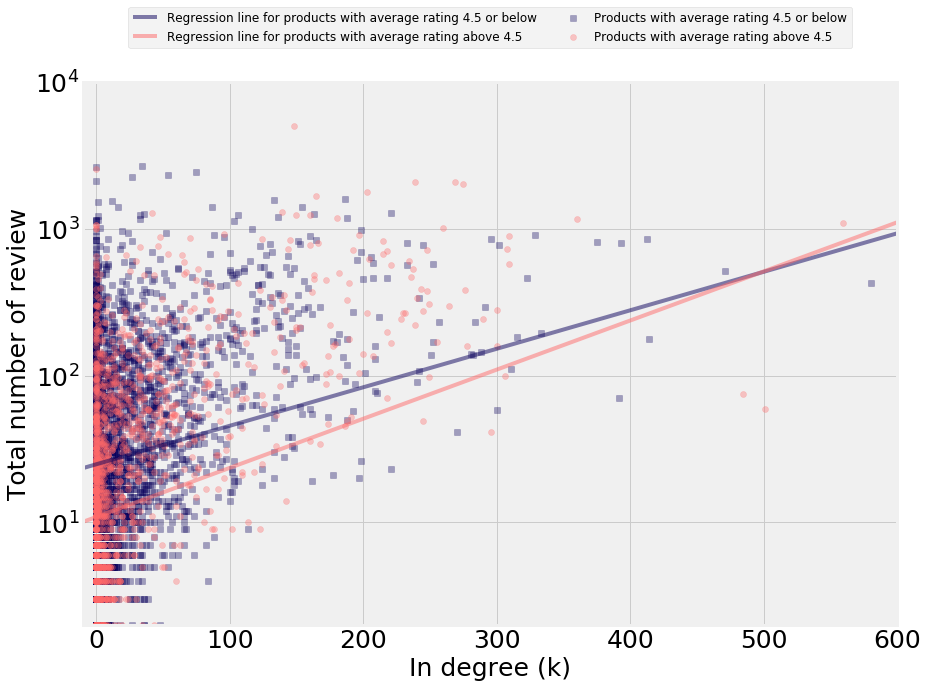

In [156]:
fig = plt.figure( figsize=(13,10))

ax = fig.add_subplot(111)

ax.scatter(x1,y1, marker='s',color='#09005c', alpha = 0.35, label='Products with average rating 4.5 or below')
ax.scatter(x2,y2, marker='o',color='#ff6969', label='Products with average rating above 4.5', alpha = 0.35)
fig = abline_plot(intercept = m_0_res1.params['Intercept'],
                 slope = m_0_res1.params['in_degree_total'], ax=ax, color='#09005c', alpha=0.5,
                  label='Regression line for products with average rating 4.5 or below');
fig = abline_plot(intercept = m_0_res2.params['Intercept'],
        slope = m_0_res2.params['in_degree_total'], ax=ax, color='#ff6969', alpha=0.5,
                  label='Regression line for products with average rating above 4.5');

#ax.set_title('PlayStation')
ax.set_xlabel('In degree (k)')
ax.set_ylabel('Total number of review')
ax.legend(fontsize='large',bbox_to_anchor=(0.5,1.1), ncol=2, loc='center')
ax.set_yscale('log')
ax.set_ylim(bottom= -10, top=10000)
ax.set_xlim(left= -10, right=600)


for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)


plt.show()
fig.savefig('6')